# A naive prediction of the future

#### Loading Libraries

In [42]:
# Data Manipulation
import pandas as pd
# Numerical Computing
import numpy as np

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings

In [43]:
# Ignore all warnings
warnings.filterwarnings('ignore')

### Forecasting the Historical Mean

#### Loading data - Setting up Baseline Implementations

In [44]:
df = pd.read_csv('/Users/isisromero/desktop/time_series/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [45]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [46]:
# Splitting Data

train = df[:-4]
test = df[-4:]

#### The Historical Mean Baseline

In [47]:
historical_mean = np.mean(train['data'])
print(historical_mean)

4.308499987499999


In [48]:
# Setting columm 'pred_mean'
test.loc[:, 'pred_mean'] = historical_mean

In [49]:
# Calculating the Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


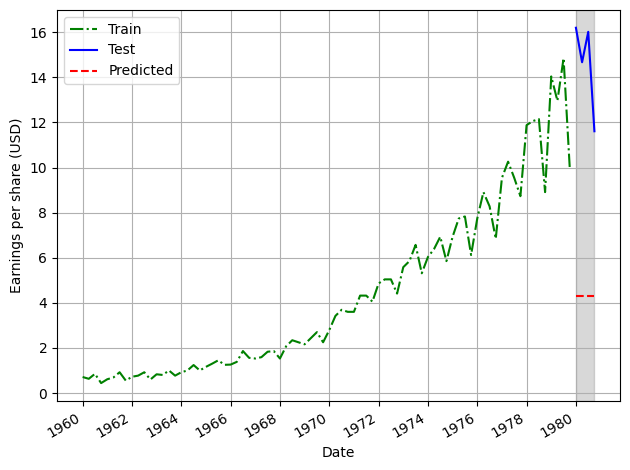

In [51]:
# First forecast visualization

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid(True)

#### Forecasting Last Year's Mean

##### Considering a shorter and recent period

In [52]:
# 1979'EPS quarters computed
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

12.96


In [53]:
# Setting a 'pred_last_yr_mean'
test.loc[:, 'pred_last_yr_mean'] = last_year_mean

In [54]:
# On MAPE function
mape_last_year_mean = mape(test['data'], test['pred_last_yr_mean'])
print(mape_last_year_mean)

15.5963680725103


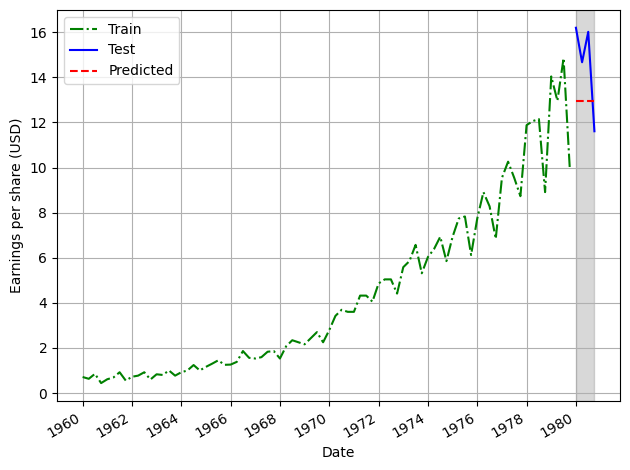

In [55]:
# MAPE visualization
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid(True)

#### Predicting using the "Last Known Value"

In [56]:
# Retrieving the last known value from train set
last = train.data.iloc[-1]
print(last)

9.99


In [57]:
# 'pred_last' to hold the predictions
test.loc[:, 'pred_last'] = last

In [58]:
mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


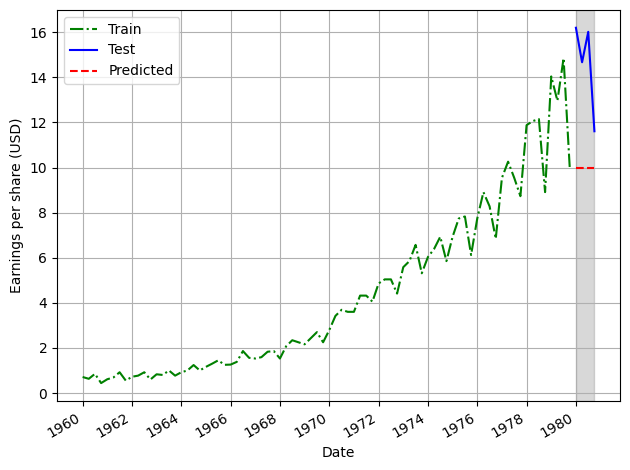

In [59]:
# MAPE visualization
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid(True)

#### Implementing "The Naive Seasonal Forecast"

In [60]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

In [61]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

11.561658552433654


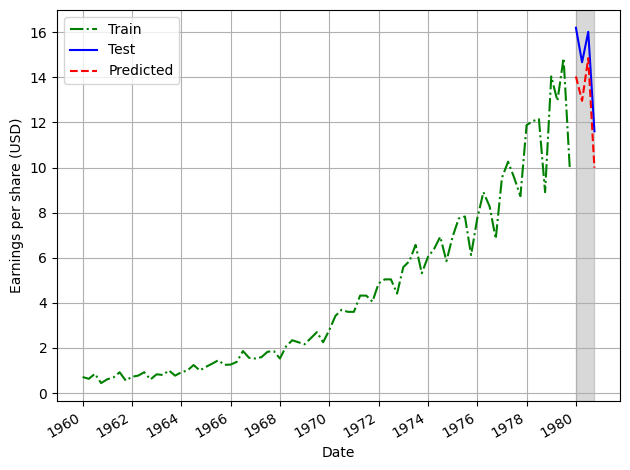

In [62]:
# Naive Seasonal MAPE visualization
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid(True)

### Model Outcomes 

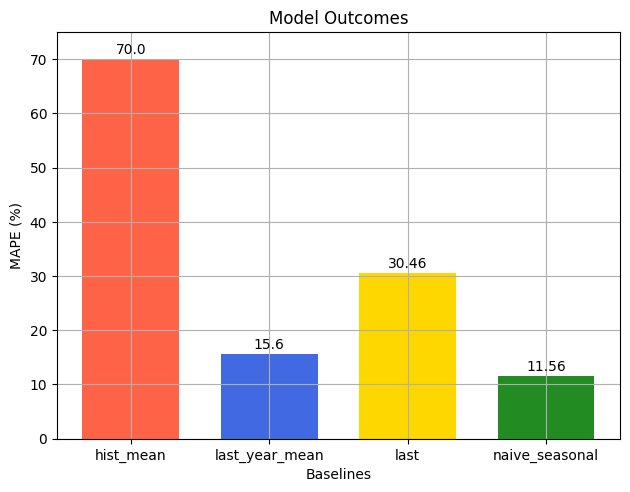

In [75]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.7, color=['tomato', 'royalblue', 'gold', 'forestgreen'])
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()
plt.title('Model Outcomes')
plt.grid(True)